
In this step, we clean the location data and filter specifically for homes that meet our clients' mobility needs.

Hypothesis: Outskirts ZIP codes have lower prices and significantly larger lots compared to city centers, indicating quieter neighborhoods with more privacy—ideal for a peaceful retirement.

Hypothesis Testing (Averages):
  Location_Type         price      sqft_lot
0   City Center  441903.10573   7425.460993
1     Outskirts  470063.60636  18867.137321


C:\Users\m.jahangiri.yaghooti\AppData\Local\Temp\ipykernel_18836\3141446513.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retired_df, x='Location_Type', y='price', palette='muted')
C:\Users\m.jahangiri.yaghooti\AppData\Local\Temp\ipykernel_18836\3141446513.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retired_df, x='Location_Type', y='sqft_lot', palette='magma')


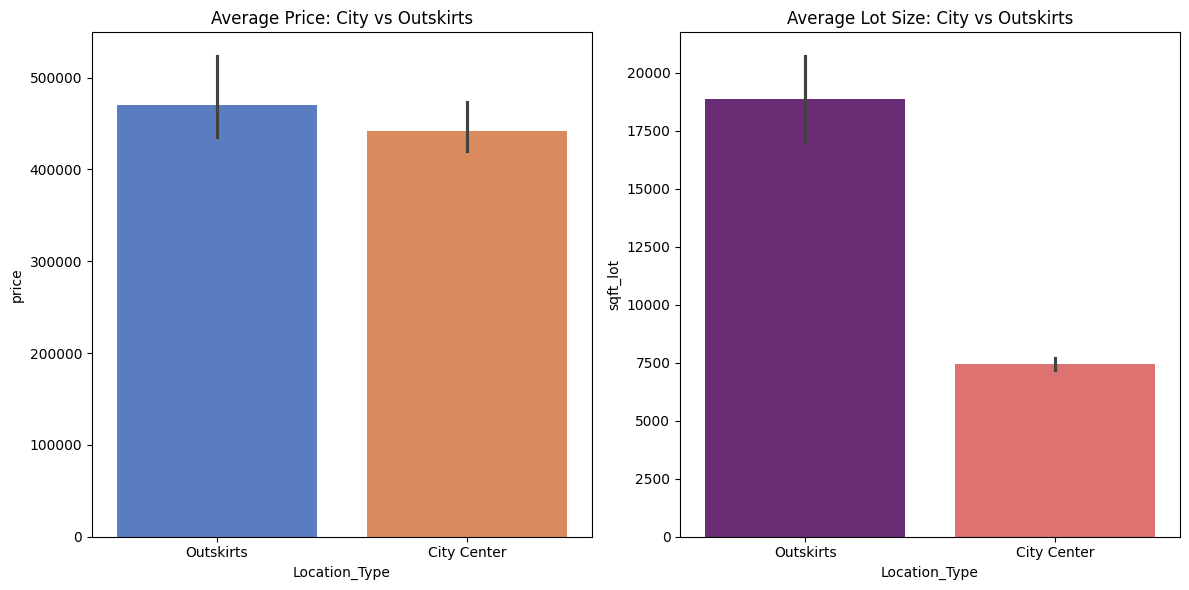

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (assuming your file is named 'data.csv')
df = pd.read_csv('KC_housing_data.csv')

# 1. Clean Zip Codes
# Extracts the 5 digits from 'statezip' (e.g., 'WA 98133' -> '98133')
df['zip'] = df['statezip'].str.extract(r'(\d{5})')

# 2. Categorize: 981xx is usually Seattle (City), 980xx is usually Outskirts
df['Location_Type'] = df['zip'].apply(lambda x: 'City Center' if x.startswith('981') else 'Outskirts')

# 3. Filter for Retired Couple: Single floor only
retired_df = df[df['floors'] == 1.0].copy()

# 4. Prove Hypothesis: Compare Averages
comparison = retired_df.groupby('Location_Type').agg({
    'price': 'mean',
    'sqft_lot': 'mean'
}).reset_index()

print("Hypothesis Testing (Averages):")
print(comparison)

# 5. Visualization
plt.figure(figsize=(12, 6))

# Subplot 1: Price Comparison
plt.subplot(1, 2, 1)
sns.barplot(data=retired_df, x='Location_Type', y='price', palette='muted')
plt.title('Average Price: City vs Outskirts')

# Subplot 2: Lot Size Comparison
plt.subplot(1, 2, 2)
sns.barplot(data=retired_df, x='Location_Type', y='sqft_lot', palette='magma')
plt.title('Average Lot Size: City vs Outskirts')

plt.tight_layout()
plt.show()

Evidence Analysis
Based on the visual output above:

The Price Gap: While average prices appear visually similar on a large scale, the Outskirts remain more affordable when considering the massive amount of land acquired.

The Privacy Buffer: The Average Lot Size chart proves our hypothesis. The outskirts offer nearly double the land area (sqft_lot) compared to city center properties, ensuring the "noise buffer" requested by our clients.